In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_img(path):
  img = cv2.imread(path)
  return np.array(img[:,:,::-1], np.uint8)

In [17]:
def findit(img, template, sizes = 10, CANNY_L = 100, CANNY_H = 200, mth= cv2.TM_CCOEFF):
  template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
  img_gray = cv2.GaussianBlur( cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),(15,15),3)
  template_shape = template_gray.shape
  img_shape = img_gray.shape

  shape_rel = np.array(img_shape[0:2])/np.array(template_shape)
  max_upscale_coeff = np.min(shape_rel)
  max_downscale_coeff = max_upscale_coeff/sizes

  size_step = (max_upscale_coeff - max_downscale_coeff) / sizes
  max_value = 0
  for i in range(sizes):
    img_edge = cv2.Canny(img_gray,CANNY_L,CANNY_H)
    factor = max_downscale_coeff + i*size_step
    dim = np.array((template_shape[1]*factor,template_shape[0]*factor), int)
    aux_template = cv2.resize(template_gray, dsize = dim)
    template_edge = cv2.Canny(aux_template,100,200)
    res = cv2.matchTemplate(img_edge,template_edge,mth)
    # cv2.normalize( res, res, 0, 1, cv2.NORM_MINMAX, -1 )
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    current_value = max_val

    if current_value > max_value:
      max_value = current_value
      max_loc_ = max_loc
      dim_ = dim
      res_ = res

  return max_loc_ , dim_ , res_



# Parte 1

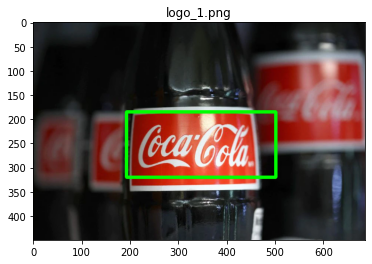

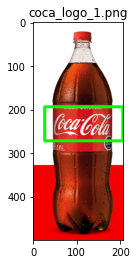

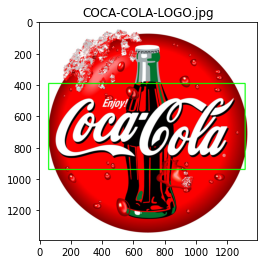

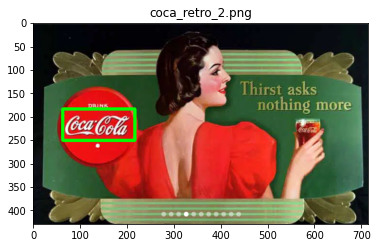

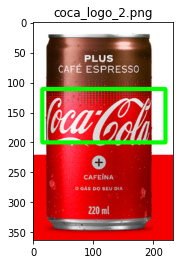

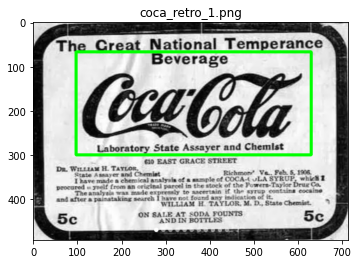

In [118]:
import os
files = os.listdir(r'/content/images')
files = [f for f in files if (f[-3:] == 'png' or f[-3:] == 'jpg') ]
template = read_img(r'/content/pattern.png')
for f in files:
  img = read_img(os.path.join('/content/images', f))
  max_loc_ , dim ,res = findit(img, template, sizes = 50)
  cv2.rectangle(img, max_loc_, (max_loc_[0] + dim[0],max_loc_[1]+ dim[1]), (0,255,0),5)
  plt.figure()
  plt.imshow(img)
  plt.title(f)